In [207]:
# Basic imports
import numpy as np
import pandas as pd
# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Pre-Processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.cluster import KMeans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


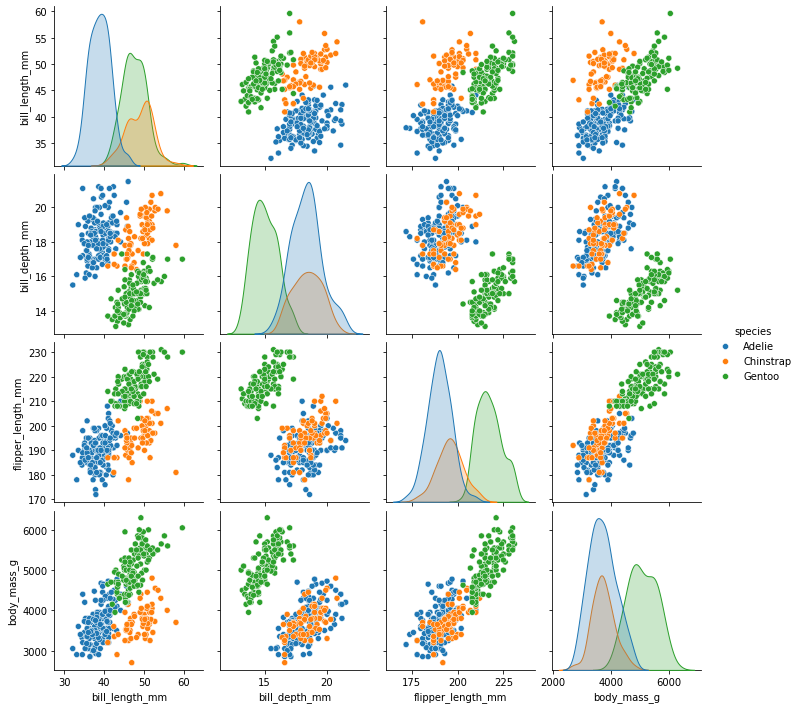

In [208]:
df = sns.load_dataset("penguins")
df.info()
df = df.dropna()
df = df.drop(["island", "sex"], axis = 1)
sns.pairplot(df, hue="species")

In [209]:
df.columns

Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

In [210]:
X = df[['bill_depth_mm', 'bill_length_mm']].copy()
y = df["species"]

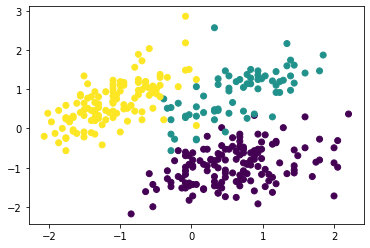

In [211]:
#Escalo porque si bien estan en milimitros, una medida es mas grande que la otra y tenderia a ser mas relevante.
X.loc[:, ['bill_depth_mm','bill_length_mm']] = StandardScaler().fit_transform(X)
plt.scatter(X['bill_depth_mm'], X['bill_length_mm'], c=LabelEncoder().fit_transform(y))

In [212]:
scores = []
nClusters = range(1,7,1) 
for k in nClusters:
    km = KMeans(n_clusters=k, n_init=10)
    scores.append(round(km.fit(X).score(X)*-1) ) 


Elbow - Codo

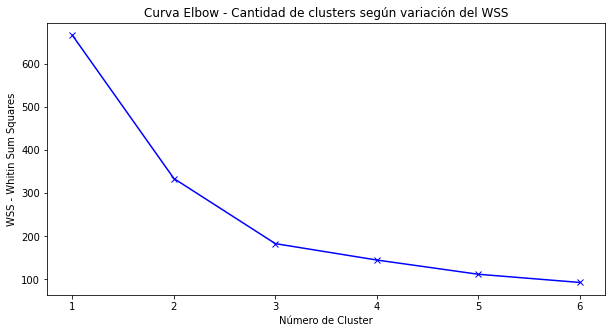

In [213]:
plt.figure(figsize=(10, 5))
plt.plot(nClusters, scores,'bx-')
plt.xlabel('Número de Cluster')
plt.ylabel('WSS - Whitin Sum Squares')
plt.title('Curva Elbow - Cantidad de clusters según variación del WSS')
plt.show()

In [214]:
n = 3
km = KMeans(n_clusters=n, n_init=10, random_state=42)
km.fit(X)
f_df = X 
f_df["cluster"] = km.labels_
f_df["species"] = y
centroids = km.cluster_centers_

In [215]:
f_df

,bill_depth_mm,bill_length_mm,cluster,species
0,0.780732,-0.896042,0,Adelie
1,0.119584,-0.822788,0,Adelie
2,0.424729,-0.676280,0,Adelie
4,1.085877,-1.335566,0,Adelie
5,1.747026,-0.859415,0,Adelie
...,...,...,...,...
338,-1.762145,0.587352,1,Gentoo
340,-1.457000,0.514098,1,Gentoo
341,-0.744994,1.173384,1,Gentoo
342,-1.202712,0.221082,1,Gentoo


'Adelie'=0, 'Chinstrap'=2, 'Gentoo'=1
#f_df[f_df["species"]=='Chinstrap']

In [216]:
#ATENCION CON EL ORDEN DE LAS CATEGORIAS
oe = OrdinalEncoder(categories=[['Adelie', 'Gentoo', 'Chinstrap']], dtype=int)
f_df.loc[:,["species"]] = oe.fit_transform(f_df[["species"]])

In [218]:
f_df["error"] = f_df["species"] != f_df["cluster"]

In [220]:
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'H', 'x', '+', '<', '>', '1', '2', '3', '4']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
n_clu = f_df["cluster"].unique()
n_clu.sort()


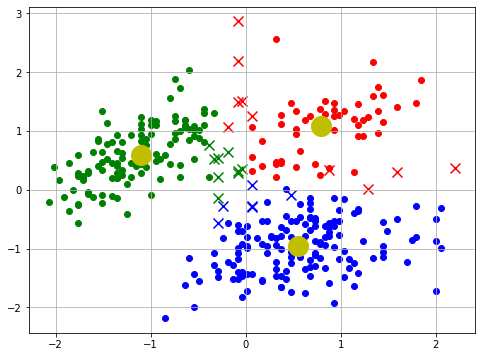

In [225]:

plt.figure(figsize=(8, 6))  # Tamaño opcional del gráfico
for i in n_clu:
    x = f_df[(f_df["cluster"]==i) & (f_df["error"]==0)]['bill_depth_mm']
    y = f_df[(f_df["cluster"]==i) & (f_df["error"]==0)]['bill_length_mm']
    c = f_df[(f_df["cluster"]==i) & (f_df["error"]==0)]['species']
    plt.scatter(x, y, color=colors[i])

for i in n_clu:
    x = f_df[(f_df["cluster"]==i) & (f_df["error"]==1)]['bill_depth_mm']
    y = f_df[(f_df["cluster"]==i) & (f_df["error"]==1)]['bill_length_mm']
    c = f_df[(f_df["cluster"]==i) & (f_df["error"]==1)]['species']
    plt.scatter(x, y, color=colors[i], marker='x', s=100)


plt.plot(centroids[:,0],centroids[:,1],'yo', markersize=20, label='centroides')
#plt.title(f"wss={wss:.2f}, bss={bss:.2f}, total={total:.2f}")
plt.grid(True)  # Opcional: activa la cuadrícula
plt.show()


In [243]:
#Cuantos errores tuve?
vc = f_df["error"].value_counts()
print("Error del : {:.2f}".format(vc.loc[True]/vc.loc[False]))


Error del : 0.08
